### RLab01 - Martina Cacciola (2097476)

## Exercise 1

In [1]:
install.packages("gridExtra")

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\Rtmp2DdwVp\downloaded_packages


In [2]:
library(rvest)
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   1.0.1
v tibble  3.2.1     v dplyr   1.1.2
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.4     v forcats 1.0.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()

Caricamento pacchetto: 'lubridate'


I seguenti oggetti sono mascherati da 'package:base':

    date, intersect, setdiff, union



Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




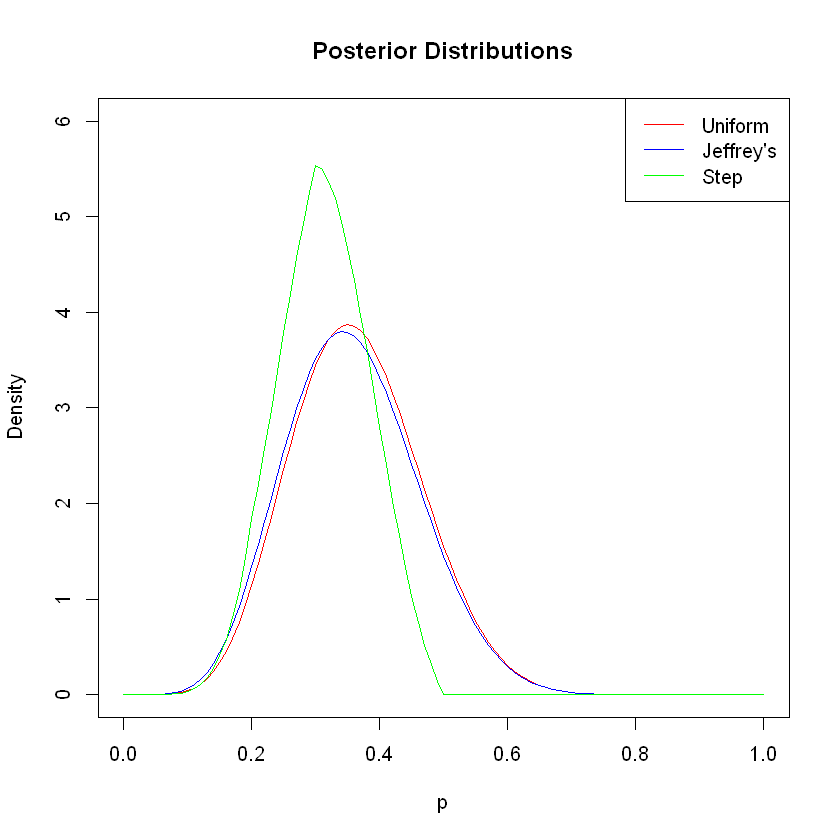

In [3]:
# Set the parameters
y <- 7    # Successes
n <- 20   # Number of trials
p = seq(0,1, by= 0.01) # Probability

# Uniform distribution (prior 1)
a1 <- 1
b1 <- 1
prior1 <- function(p) dbeta(p, a1, b1)

# Jeffrey's prior (prior 2)
a2 <- 0.5
b2 <- 0.5
prior2 <- function(p) dbeta(p, alpha2, beta2)

# Step function (prior 3)
posterior3 <- function(p) {
    ifelse(p <= 0.2, p,
           ifelse(p <= 0.3, 0.2,
                  ifelse(p <= 0.5, 0.5 - p, 0))) * dbinom(y, n, p)
}

# Posterior 1
posterior1 <- function(p) dbeta(p, y + a1, n - y + b1)

# Posterior 2
posterior2 <- function(p) dbeta(p, y+a2, n-y+b2)

#Posterior 3
posterior3 <- function(p) {
    step_prior <- ifelse(p <= 0.2, p,
                         ifelse(p <= 0.3, 0.2,
                                ifelse(p <= 0.5, 0.5 - p, 0)))
    likelihood <- dbinom(y, n, p)
    unnormalized_posterior <- step_prior * likelihood
    normalization_constant <- sum(unnormalized_posterior * (p[2] - p[1]))
    normalized_posterior <- unnormalized_posterior / normalization_constant
    return(normalized_posterior)
}

# Plot the posterior distributions
plot(p, posterior1(p), type = "l", col = "red", xlab = "p", ylab = "Density", main = "Posterior Distributions", ylim=c(0,6))
lines(p, posterior2(p), col = "blue")
lines(p, posterior3(p), col = "green")
legend("topright", legend = c("Uniform", "Jeffrey's", "Step"), col = c("red", "blue", "green"), lty = 1)

In [4]:
# Compute the first two moments

# Mean
posterior1_mean <- sum(p * posterior1(p) * (p[2] - p[1]))
posterior2_mean <- sum(p * posterior2(p) * (p[2] - p[1]))
posterior3_mean <- sum(p * posterior3(p) * (p[2] - p[1]))

# Variance
posterior1_var <- sum((p - posterior1_mean)^2 * posterior1(p) * (p[2] - p[1]))
posterior2_var <- sum((p - posterior2_mean)^2 * posterior2(p) * (p[2] - p[1]))
posterior3_var <- sum((p - posterior3_mean)^2 * posterior3(p) * (p[2] - p[1]))
cat('The first and second moment using a uniform prior are: \t', posterior1_mean , '-', posterior1_var, '\n')
cat('The first and second moment using a Jeffrey prior are: \t', posterior2_mean, '-', posterior2_var, '\n')
cat('The first and second moment using a step prior are: \t', posterior3_mean, '-', posterior3_var)

The first and second moment using a uniform prior are: 	 0.3636364 - 0.01006109 
The first and second moment using a Jeffrey prior are: 	 0.3571429 - 0.01043599 
The first and second moment using a step prior are: 	 0.3120146 - 0.004995067

In [5]:
# Credibility interval for Posterior 1
posterior1_ci <- qbeta(c(0.025, 0.975), y + a1, n - y + b1)

# Credibility interval for Posterior 2
posterior2_ci <- qbeta(c(0.025, 0.975), y + a2, n - y + b2)

# Credibility interval for Posterior 3
posterior3_cdf <- cumsum(posterior3(p) * (p[2] - p[1]))

# Find lower and upper bounds of credibility interval
lower_bound3 <- min(p[posterior3_cdf >= 0.025])
upper_bound3 <- max(p[posterior3_cdf <= 0.975])

In [6]:
summary_table <- data.frame(
    Distribution = c("Uniform", "Jeffrey's", "Step"),
    Mean = c(posterior1_mean, posterior2_mean, posterior3_mean),
    Variance = c(posterior1_var, posterior2_var, posterior3_var),
    `Lower CI` = c(posterior1_ci[1], posterior2_ci[1], lower_bound3),
    `Upper CI` = c(posterior1_ci[2], posterior2_ci[2], upper_bound3)
)
print(summary_table)

  Distribution      Mean    Variance  Lower.CI  Upper.CI
1      Uniform 0.3636364 0.010061085 0.1810716 0.5696755
2    Jeffrey's 0.3571429 0.010435993 0.1722762 0.5677661
3         Step 0.3120146 0.004995067 0.1800000 0.4400000


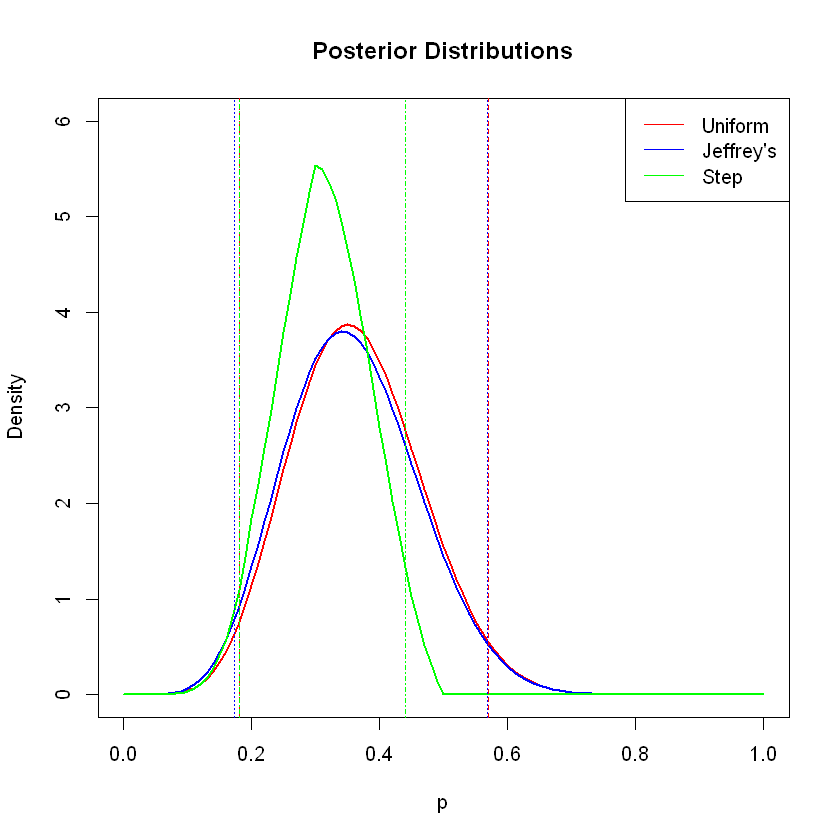

In [7]:
plot(p, posterior1(p), type = "l", col = "red",, lwd = 2,xlab = "p", ylab = "Density", main = "Posterior Distributions", ylim=c(0,6))
lines(p, posterior2(p), col = "blue", lwd = 2)
lines(p, posterior3(p), col = "green", lwd = 2)
abline(v = c(posterior1_ci[1], posterior1_ci[2]), lty = 2, col = "red")
abline(v = c(posterior2_ci[1], posterior2_ci[2]), lty = 3, col = "blue")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "green")
legend("topright", legend = c("Uniform", "Jeffrey's", "Step"), col = c("red", "blue", "green"), lty = 1)

## Exercise 2

Posterior mean with uniform prior: 0.1525424 
Posterior variance with uniform prior: 0.001086329 
Posterior mean with Beta prior: 0.1487603 
Posterior variance with Beta prior: 0.001037957 


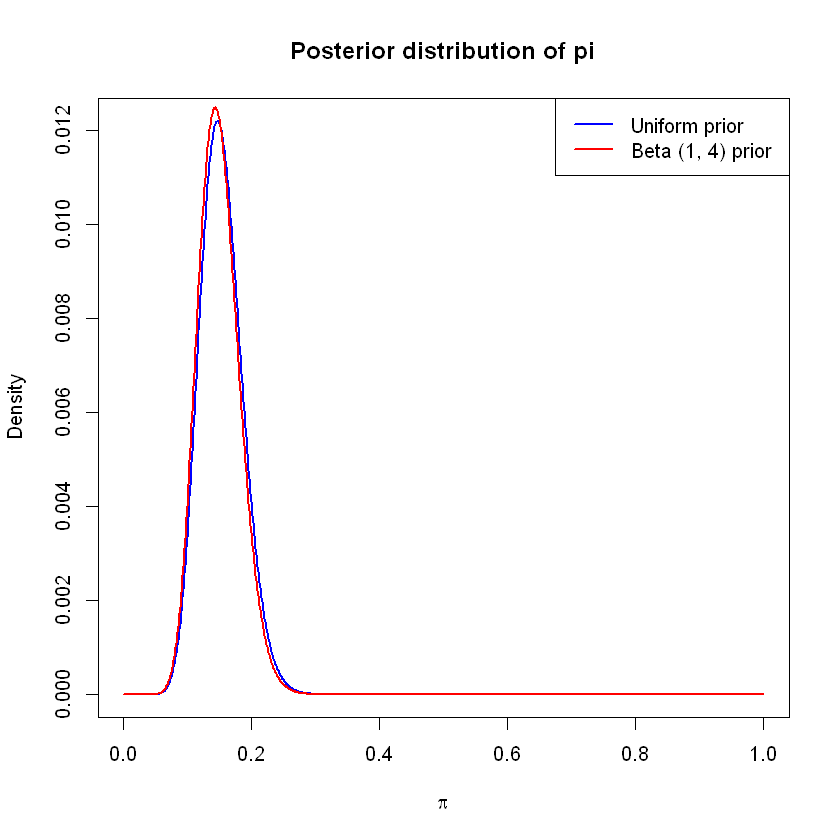

In [9]:
n <- 116
y <- 17
pi <- seq(0, 1, length.out = 1000)

# Uniform prior
likelihood <- dbinom(y, n, pi)
posterior_unif <- likelihood
# Normalize
posterior_unif <- posterior_unif / sum(posterior_unif)

# Beta (1, 4) prior
posterior_beta <- likelihood * dbeta(pi, 1, 4)
posterior_beta <- posterior_beta / sum(posterior_beta)

# Plotting the posterior distribution
plot(pi, posterior_unif, type = "l", col = "blue", lwd = 2,
     xlab = expression(pi), ylab = "Density",
     main = "Posterior distribution of pi")
lines(pi, posterior_beta, col = "red", lwd = 2)
legend("topright", c("Uniform prior", "Beta (1, 4) prior"),
       col = c("blue", "red"), lty = 1, lwd = 2)

# Summarizing the results
mean_unif <- sum(pi * posterior_unif)
var_unif <- sum((pi - mean_unif)^2 * posterior_unif)
mean_beta <- sum(pi * posterior_beta)
var_beta <- sum((pi - mean_beta)^2 * posterior_beta)

cat("Posterior mean with uniform prior:", mean_unif, "\n")
cat("Posterior variance with uniform prior:", var_unif, "\n")
cat("Posterior mean with Beta prior:", mean_beta, "\n")
cat("Posterior variance with Beta prior:", var_beta, "\n")

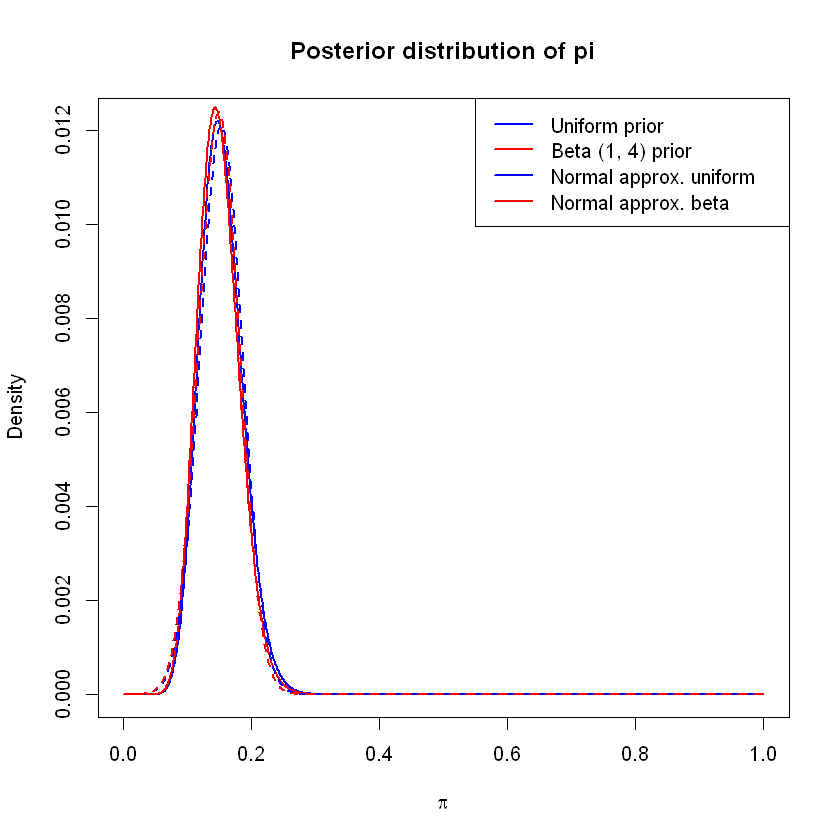

In [30]:
# Normal approximation (uniform)
mu_unif <- sum(pi * posterior_unif)
sigma_unif <- sqrt(sum((pi - mu_unif)^2 * posterior_unif))
posterior_norm_unif <- dnorm(pi, mu_unif, sigma_unif)
posterior_norm_unif <- posterior_norm_unif / sum(posterior_norm_unif)

# Normal approximation (beta)
mu_beta <- sum(pi * posterior_beta)
sigma_beta <- sqrt(sum((pi - mu_beta)^2 * posterior_beta))
posterior_norm_beta <- dnorm(pi, mu_beta, sigma_beta)
posterior_norm_beta <- posterior_norm_beta / sum(posterior_norm_beta)

# Plotting the posterior distributions
plot(pi, posterior_unif, type = "l", col = "blue", lwd = 2,
     xlab = expression(pi), ylab = "Density",
     main = "Posterior distribution of pi")
lines(pi, posterior_beta, col = "red", lwd = 2)
lines(pi, posterior_norm_unif, col = "blue", lty = "dashed", lwd = 2)
lines(pi, posterior_norm_beta, col = "red", lty = "dashed", lwd = 2)
legend("topright", c("Uniform prior", "Beta (1, 4) prior", "Normal approx. uniform", "Normal approx. beta"),
       col = c("blue", "red", "blue", "red"), lwd = 2)

                      Lower limit Upper limit
Uniform                0.09409409   0.2222222
Beta                   0.09109109   0.2172172
Normal approx Uniform  0.08794292   0.2171418
Normal approx Beta     0.08561552   0.2119051


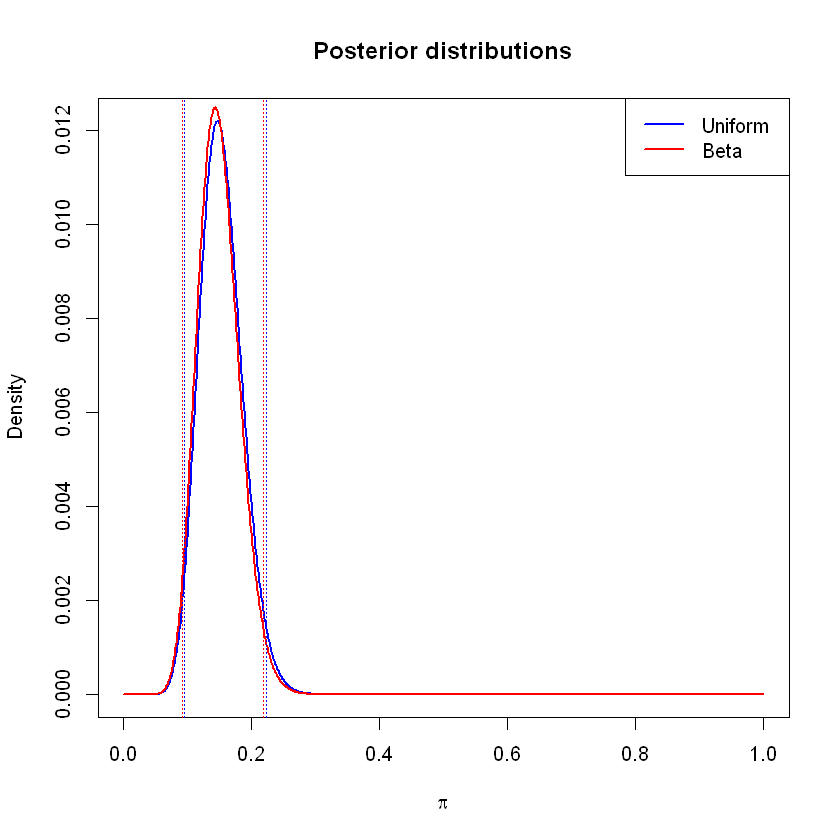

In [11]:
# Compute the 95% credibility interval for the original posterior
cumsum_unif <- cumsum(posterior_unif)
cumsum_beta <- cumsum(posterior_beta)
quantile_unif <- c(pi[which(cumsum_unif >= 0.025)[1]], pi[which(cumsum_unif >= 0.975)[1]])
quantile_beta <- c(pi[which(cumsum_beta >= 0.025)[1]], pi[which(cumsum_beta >= 0.975)[1]])

# Compute the 95% credibility interval for the normal approximation
quantile_norm_unif <- qnorm(c(0.025, 0.975), mean = mu_unif, sd = sigma_unif)
quantile_norm_beta <- qnorm(c(0.025, 0.975), mean = mu_beta, sd = sigma_beta)

# Create a summary table
summary_table <- rbind(c(quantile_unif), c(quantile_beta), c(quantile_norm_unif), c(quantile_norm_beta))
colnames(summary_table) <- c("Lower limit", "Upper limit")
rownames(summary_table) <- c("Uniform", "Beta", "Normal approx Uniform", "Normal approx Beta")
print(summary_table)

# Plot the posterior distributions
plot(pi, posterior_unif, type = "l", col = "blue", lwd = 2,
     main = "Posterior distributions",
     xlab = expression(pi),
     ylab = "Density")
lines(pi, posterior_beta, col = "red", lwd = 2)

# Add the limits on the plot
abline(v = quantile_unif[1], col = "blue", lty = 3)
abline(v = quantile_unif[2], col = "blue", lty = 3)
abline(v = quantile_beta[1], col = "red", lty = 3)
abline(v = quantile_beta[2], col = "red", lty = 3)

# Add a legend
legend("topright",
       legend=c("Uniform","Beta"),
       col=c("blue","red"),
       lty=c(1,1),
       lwd=c(2,2))

## Exercise 3

## a) + b)

The most probable value for p with flat prior is: 0.4994995
The most probable value for p with beta prior is: 0.4994995
The 95% credibility interval for p with flat prior is: 0.330606 0.669394
The 95% credibility interval for p with beta prior is: 0.3354445 0.6645555

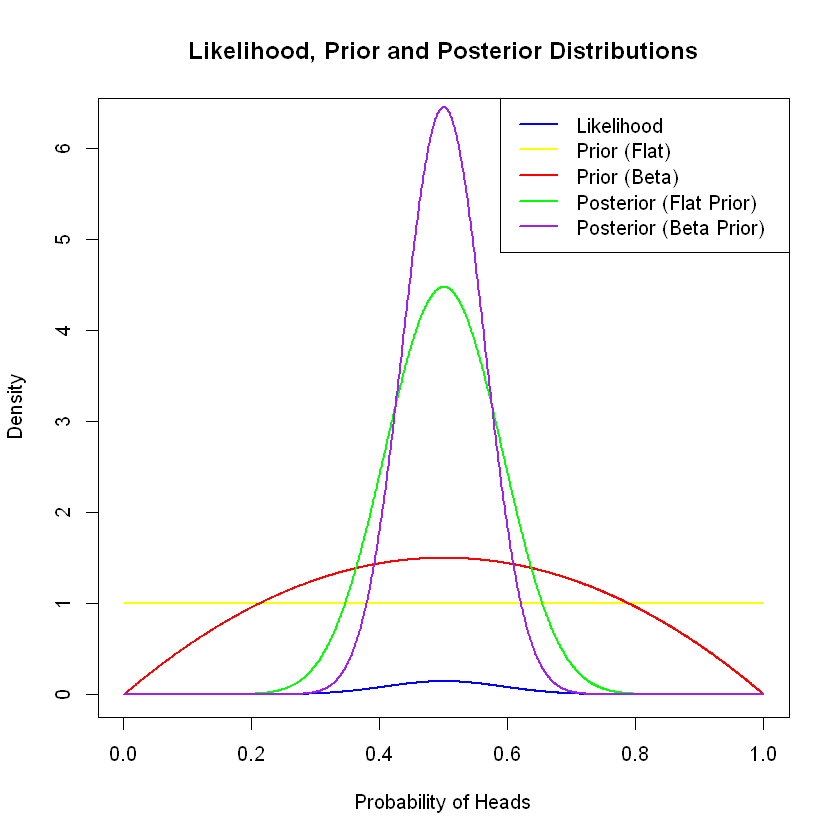

In [35]:
# Set the number of coin flips and the observed data
n <- 30
data <- c("T", "T", "T", "T", "T", "H", "T", "T", "H", "H", "T", "T", "H", "H", "H", "T", "H", "T", "H", "T", "H", "H", "T", "H", "T", "H", "T", "H", "H", "H")

# Calculate the number of heads and tails
num_heads <- sum(data == 'H')
num_tails <- n - num_heads

# Define a function to calculate the likelihood
likelihood <- function(p) {
  dbinom(num_heads, size = n, prob = p)
}

# Define a function to calculate the posterior with a flat prior
posterior_flat <- function(p) {
  likelihood(p) / integrate(likelihood, lower = 0, upper = 1)$value
}

# Define a function to calculate the posterior with a beta(2,2) prior
posterior_beta <- function(p) {
  dbeta(p, shape1 = num_heads + 2, shape2 = num_tails + 2)* likelihood(p) / integrate(function(x) dbeta(x, shape1 = num_heads + 1, shape2 = num_tails + 1) * likelihood(x), lower = 0, upper = 1)$value 
}

# Plot the likelihood, prior and posterior distributions
p <- seq(0, 1, length.out = 1000)
plot(p, likelihood(p), type = 'l', col = 'blue', lwd = 2,
     main = 'Likelihood, Prior and Posterior Distributions',
     xlab = 'Probability of Heads', ylab = 'Density', ylim = c(0, 6.3))
lines(p, dunif(p, min = 0, max =1), col ='yellow', lwd = 2)                                                                                      
lines(p, dbeta(p, shape1 = 2, shape2 = 2), col = 'red', lwd = 2)
lines(p, posterior_flat(p), col = 'green', lwd = 2)
lines(p, posterior_beta(p), col = 'purple', lwd = 2)
legend('topright', legend = c('Likelihood', 'Prior (Flat)', 'Prior (Beta)', 'Posterior (Flat Prior)', 'Posterior (Beta Prior)'), col = c('blue', 'yellow', 'red', 'green', 'purple'), lty = 1, lwd = 2)

# Evaluate the most probable value for the coin probability p (flat prior)
p_map_flat <- p[which.max(posterior_flat(p))]
cat('The most probable value for p with flat prior is:', p_map_flat)
                                                                                      
# Evaluate the most probable value for the coin probability p (beta prior)                                                                                    
p_map_beta <- p[which.max(posterior_beta(p))]
cat('\nThe most probable value for p with beta prior is:', p_map_beta)

# Estimate a 95% credibility interval with flat prior
ci <- qbeta(c(0.025, 0.975), shape1 = num_heads + 1, shape2 = num_tails + 1)
cat('\nThe 95% credibility interval for p with flat prior is:', ci)

# Estimate a 95% credibility interval with beta prior                                                                                     
ci <- qbeta(c(0.025, 0.975), shape1 = num_heads + 2, shape2 = num_tails + 2)
cat('\nThe 95% credibility interval for p with beta prior is:', ci)

## c)

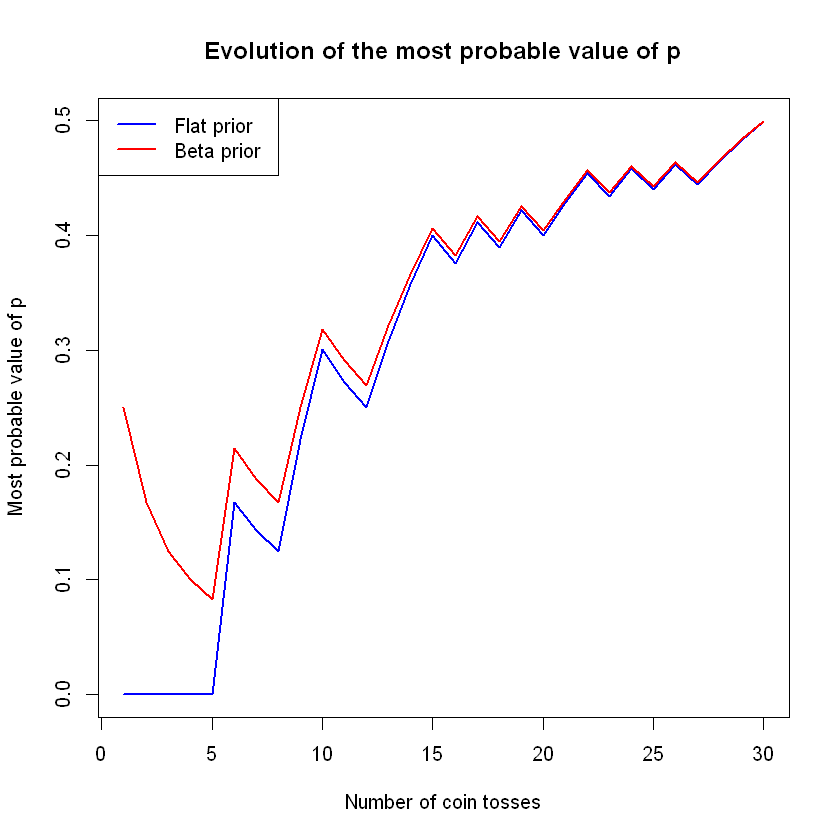

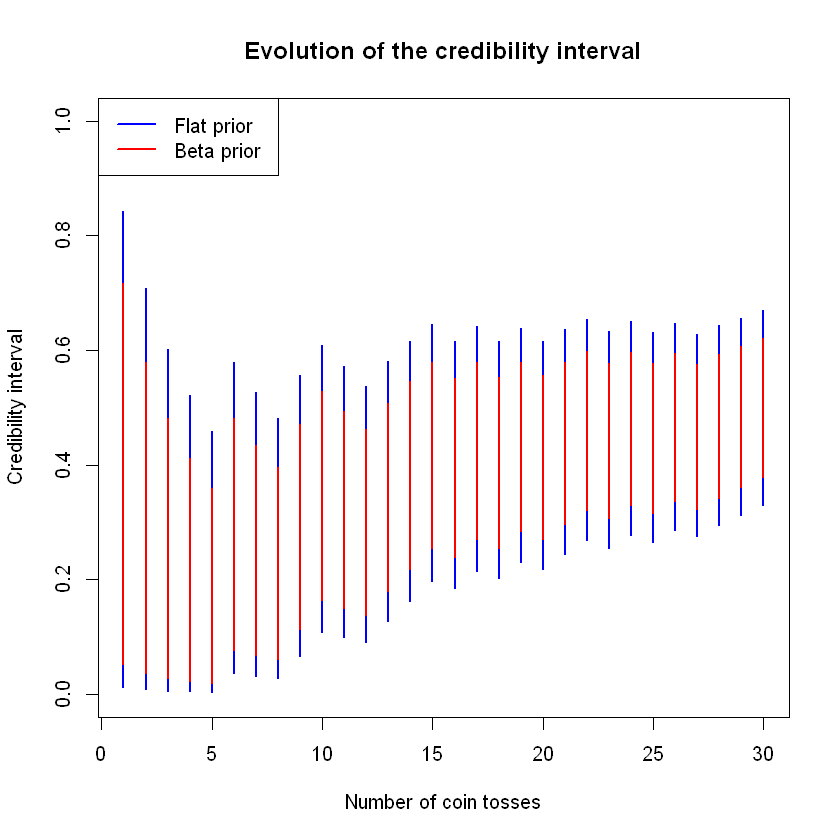

In [36]:
# Initialize variables to store the results
p_map_flat <- numeric(n)
ci_lower_flat <- numeric(n)
ci_upper_flat <- numeric(n)
p_map_beta <- numeric(n)
ci_lower_beta <- numeric(n)
ci_upper_beta <- numeric(n)

# Perform a sequential analysis of the data
for (j in 1:n) {
  # Calculate the number of heads and tails in the first j coin tosses
  num_heads <- sum(data[1:j] == 'H')
  num_tails <- j - num_heads
  
  # Define a function to calculate the likelihood
  likelihood <- function(p) {
    dbinom(num_heads, size = j, prob = p)
  }
  
  # Define a function to calculate the posterior with a flat prior
  posterior_flat <- function(p) {
    likelihood(p) / integrate(likelihood, lower = 0, upper = 1)$value
  }
  
  # Define a function to calculate the posterior with a beta prior
  posterior_beta <- function(p) {
    dbeta(p, shape1 = num_heads + 2, shape2 = num_tails + 2)* likelihood(p) / integrate(function(x) dbeta(x, shape1 = num_heads + 2, shape2 = num_tails + 2) * likelihood(x), lower = 0, upper = 1)$value
  }
  
  # Evaluate the most probable value for the coin probability p
  p <- seq(0, 1, length.out = 1000)
  p_map_flat[j] <- p[which.max(posterior_flat(p))]
  p_map_beta[j] <- p[which.max(posterior_beta(p))]
  
  # Estimate a 95% credibility interval for flat prior
  ci_flat_lower <- uniroot(function(x) integrate(posterior_flat, lower = 0, upper = x)$value - 0.025,
                           lower = 0, upper = 1)$root
  ci_lower_flat[j] <- ci_flat_lower
  
  ci_flat_upper <- uniroot(function(x) integrate(posterior_flat, lower = x, upper = 1)$value - 0.025,
                           lower = ci_flat_lower, upper = 1)$root
  ci_upper_flat[j] <- ci_flat_upper
  
  
  # Estimate a 95% credibility interval for beta prior
   ci_beta_lower <- uniroot(function(x) integrate(posterior_beta, lower = 0, upper = x)$value -0.025,
                            lower=0, upper=1)$root
   ci_lower_beta[j] <- ci_beta_lower
   
   ci_beta_upper <- uniroot(function(x) integrate(posterior_beta, lower=x , upper=1)$value -0.025,
                            lower=ci_beta_lower , upper=1)$root
   ci_upper_beta[j] <- ci_beta_upper
   
}

# Plot the evolution of the most probable value for the two priors
plot(p_map_flat, type = "l", col = "blue", lwd = 2,
     xlab = "Number of coin tosses", ylab = "Most probable value of p",
     main = "Evolution of the most probable value of p")
lines(p_map_beta, col = "red", lwd = 2)
legend("topleft", legend = c("Flat prior", "Beta prior"),
       col = c("blue", "red"), lty = 1, lwd = 2)

# Plot the evolution of the credibility interval for the two priors
plot(ci_lower_flat, type = "n", ylim = c(0, 1),
     xlab = "Number of coin tosses", ylab = "Credibility interval",
     main = "Evolution of the credibility interval")
segments(x0 = 1:n, y0 = ci_lower_flat, x1 = 1:n, y1 = ci_upper_flat,
         col = "blue", lwd = 2)
segments(x0 = 1:n, y0 = ci_lower_beta, x1 = 1:n, y1 = ci_upper_beta,
         col = "red", lwd = 2)
legend("topleft", legend = c("Flat prior", "Beta prior"),
       col = c("blue", "red"), lty = 1, lwd = 2)

## d)

In [37]:
# Evaluate the most probable value for the coin probability p for the one-step analysis
p_map_flat <- optimize(posterior_flat, interval = c(0, 1), maximum = TRUE)$maximum
p_map_beta <- optimize(posterior_beta, interval = c(0, 1), maximum = TRUE)$maximum

# Estimate a 95% credibility interval for flat prior for the one-step analysis
ci_flat_lower <- uniroot(function(x) integrate(posterior_flat, lower = 0, upper = x)$value - 0.025,
                                  lower = 0, upper = 1)$root
ci_flat_upper <- uniroot(function(x) integrate(posterior_flat, lower = x, upper = 1)$value - 0.025,
                                  lower = ci_flat_lower, upper = 1)$root

# Estimate a 95% credibility interval for beta prior for the one-step analysis
ci_beta_lower <- qbeta(0.025, shape1 = num_heads + 2, shape2 = num_tails + 2)
ci_beta_upper <- qbeta(0.975, shape1 = num_heads + 2, shape2 = num_tails + 2)

cat ("The most probable value of p with a flat prior is:", p_map_flat)
cat ("\nThe most probable value of p with a beta prior is:", p_map_beta)
cat ("\nThe credibility interval of p with flat prior is:", ci_flat_lower, "-", ci_flat_upper)
cat ("\nThe credibility interval of p with flat prior is:", ci_beta_lower, "-", ci_beta_upper)

The most probable value of p with a flat prior is: 0.5
The most probable value of p with a beta prior is: 0.5
The credibility interval of p with flat prior is: 0.3306054 - 0.6693974
The credibility interval of p with flat prior is: 0.3354445 - 0.6645555

The values computed with sequential analysis are the same to those produced by the one-step analysis performed before, as expected.

## Exercise 4- Six Boxes Toy Model : inference

### 1)

Ramdomly selected box: H_ 0

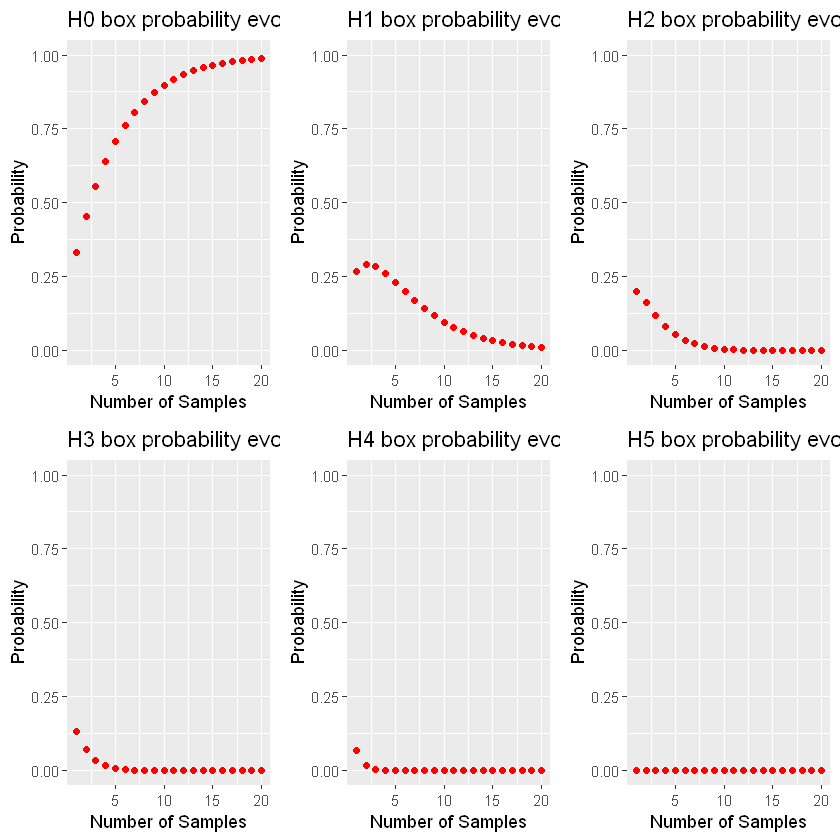

In [7]:
# Define the boxes H_j (where j=1 is white and j=0 black) and number of iterations
j = sample(0:5, 1)
iterations = 20
cat('Ramdomly selected box: H_',j)

# Simulate the extraction of a white/black stone from the box
# j/5 = probability of extracting white
samples = function(j){
    out = ifelse(runif(length(j)) < j/5, 1, 0)
    return(out)
}

# Calculate the conditional probability of extracting a stone from a box j
# given the color ('sample') of the previously extracted stone
probE_H = function(sample, j){
  ifelse(sample, j/5, (5-j)/5)
}


# Initial probability distribution of each box (uniform prior)
prob_H = c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

prob_H0 = c()
prob_H1 = c()
prob_H2 = c()
prob_H3 = c()
prob_H4 = c()
prob_H5 = c()

#Update the probability of each box for the next extractions
for (x in 1:iterations){
     s = sample(j)
     probE_H0 = c(probE_H(s, 0), probE_H(s, 1), probE_H(s, 2), probE_H(s, 3), probE_H(s, 4), probE_H(s, 5) )
evidence = 0
    for (J in 1:6){
        evidence = evidence + probE_H0[J]*prob_H[J]
    }
# Posterior probability distribution prob_H
    for (J in 1:6){
        prob_H[J] =  probE_H0[J]*prob_H[J]/evidence 
    }
    
    
# Store the posterior probability for each box in separate vectors  
    prob_H0 = c(prob_H0, prob_H[1])
    prob_H1 = c(prob_H1, prob_H[2])
    prob_H2 = c(prob_H2, prob_H[3])
    prob_H3 = c(prob_H3, prob_H[4])
    prob_H4 = c(prob_H4, prob_H[5])
    prob_H5 = c(prob_H5, prob_H[6])

}
p0 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H0), color='red') + labs(title='H0 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p1 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H1), color='red') + labs(title='H1 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p2 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H2), color='red') + labs(title='H2 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p3 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H3), color='red') + labs(title='H3 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p4 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H4), color='red') + labs(title='H4 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)
p5 = ggplot() + geom_point(aes(x=1:iterations, y=prob_H5), color='red') + labs(title='H5 box probability evolution', x='Number of Samples', y='Probability')+ylim(0,1)+xlim(1,iterations)

grid.arrange(p0, p1, p2, p3, p4, p5, ncol=3, nrow=2)